In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../lib/')
from frustration_graph import phase_transition
import pickle
import os
import copy
import time
import os

In [2]:
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

OperationalError: locking protocol

In [3]:
res_path = "../../Results/Ising_Frustrated/"
files = os.listdir(res_path + "CI/")

L = 20

ratios = np.concatenate((np.arange(0, 0.3, 0.01), 
                         np.arange(0.3, 0.7, 0.02), 
                         np.arange(0.7, 1, 0.1)))

In [3]:
qpu = DWaveSampler(profile='CINECA') #'defaults'
sampler = EmbeddingComposite(qpu)

## Frustrated Ising without Periodic Conditions

In [41]:
filename = f"0/{ratios.size}_ratio_points.pickle"

if not os.path.isfile(res_path + filename):
    Magnetizations, Frequencies, Energies = phase_transition(L, ratios, sampler, 
                                                             num_reads=100)

    with open(res_path + filename, "wb") as file:
        pickle.dump([Magnetizations, Energies, Frequencies] , file)
else:
    with open(res_path + filename, "rb") as file:
        Magnetizations, Frequencies, Energies = pickle.load(file)

## Creating transition phase graph

In [44]:
with open(res_path + "CI/" + files[2], "rb") as file:
            Magnetizations, Frequencies, Energies = pickle.load(file)

n = len(Magnetizations)

Mag = []
Chi = []

for i in range(n):
    M = np.array(Magnetizations[i])
    F = np.array(Frequencies[i])
    
    M_mean = (M * F).sum() / F.sum()
    C = ((M - M_mean)**2 * F).sum() / F.sum()
    Mag.append(M_mean)
    Chi.append(C)

In [46]:
len(Magnetizations), len(Frequencies), len(Energies)

(54, 54, 54)

Text(0, 0.5, '|M|')

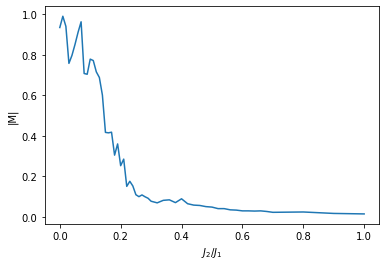

In [47]:
plt.plot(np.abs(ratios), Mag)
plt.xlabel(r'$J_2$/$J_1$')
plt.ylabel('|M|')

Text(0, 0.5, '$\\chi$')

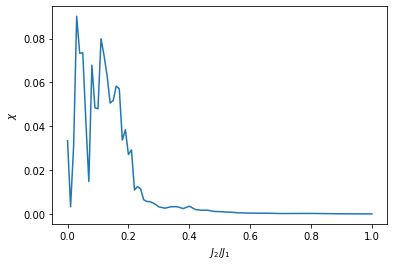

In [48]:
plt.plot(np.abs(ratios), Chi)
plt.xlabel(r'$J_2$/$J_1$')
plt.ylabel(r'$\chi$')

## Phase transitions with CI

In [4]:
import os
start = len(os.listdir(res_path + "CI/"))

for i in range(start, start+10):
    filename = f"CI/{i}_{ratios.size}_ratio_points.pickle"

    if not os.path.isfile(res_path + filename):
        Magnetizations, Frequencies, Energies = phase_transition(L, ratios, sampler, 
                                    num_reads=1000)

        with open(res_path + filename, "wb") as file:
            pickle.dump([Magnetizations, Frequencies, Energies] , file)
    else:
        with open(res_path + filename, "rb") as file:
            Magnetizations, Frequencies, Energies = pickle.load(file)

NameError: name 'sampler' is not defined

## Creating transition phase graph

In [5]:
files = os.listdir(res_path + "CI/")

M, E, Ch = [], [], []

for file in files: 
    with open(res_path+ "CI/" + file, "rb") as file:
            Magnetizations, Frequencies, Energies = pickle.load(file)

    n = len(Magnetizations)

    Mag, Chi, Ene = [], [], []

    for i in range(n):
        Magn = np.array(Magnetizations[i])
        Freq = np.array(Frequencies[i])
        En = np.array(Energies[i])
        
        M_mean = (Magn * Freq).sum() / Freq.sum()
        En_mean = (En * Freq).sum() / Freq.sum()
        C = ((Magn - M_mean)**2 * Freq).sum() / Freq.sum()
        Mag.append(M_mean)
        Chi.append(C)
        Ene.append(En_mean)


    M.append(Mag), E.append(En), Ch.append(Chi)

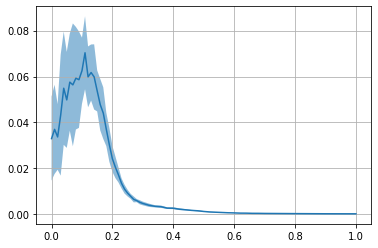

In [8]:
Ch_mean = np.mean(Ch, axis=0)
Ch_std = np.std(Ch, axis=0)

plt.plot(ratios, Ch_mean)
plt.fill_between(ratios, Ch_mean - Ch_std, Ch_mean + Ch_std, alpha=0.5)
plt.grid()

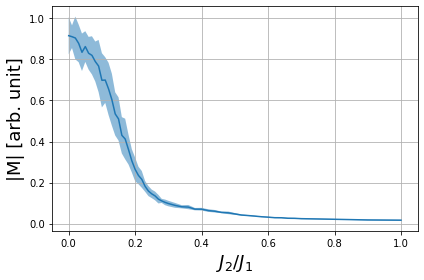

In [18]:
M_mean = np.mean(M, axis=0)
M_std = np.std(M, axis=0)

plt.plot(ratios, M_mean)
plt.fill_between(ratios, M_mean - M_std, M_mean + M_std, alpha=0.5)
plt.grid()
plt.xlabel(r'$J_2$/$J_1$', fontsize=18)
plt.ylabel('|M| [arb. unit]', fontsize=18)
plt.tight_layout()
plt.savefig('../../Images/Ising_Frustrated/magnetization.png', dpi=600, transparent=True)

## Graph Plot

In [19]:
L = 20
Lattice_Size = (L, L)
periodic = True

C_G = nx.grid_graph(dim=Lattice_Size, periodic=periodic)

for x in range(L-1):
    for y in range(L-1):
        C_G.add_edge((x, y), (x+1, y+1))

        C_G.add_edge((x+1, y), (x, y+1))

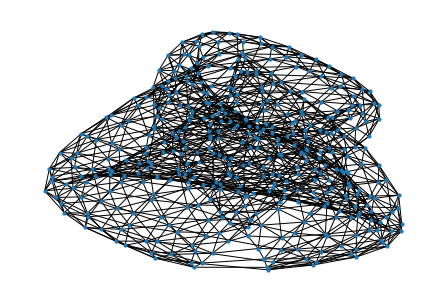

In [20]:
nx.draw(G=C_G, node_size=10)